In [1]:
#importin libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#importing training set and testing set
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
data = [train_df,test_df]


In [3]:
#making Passenger_id as index
train_df.set_index(['PassengerId'],inplace = True)
test_df.set_index(['PassengerId'],inplace = True)


In [4]:
#checking for null values
train_df.isnull().sum()
test_df.isnull().sum()


Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [5]:
#Imputing missing values
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values = 'NaN',strategy = 'mean',axis = 0)
imputer = imputer.fit(train_df.loc[:,['Age']])
train_df.loc[:,['Age']] = imputer.transform(train_df.loc[:,['Age']])
imputer = imputer.fit(test_df.loc[:,['Age']])
test_df.loc[:,['Age']] = imputer.transform(test_df.loc[:,['Age']])


E:\mrunali\anaconda\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [6]:
train_df.Embarked.value_counts()


S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [7]:
train_df.Embarked.fillna('S',inplace = True)
test_df.Fare.fillna(test_df.Fare.mean(),inplace = True)


In [8]:
#dropping insignificant columns
train_df.drop(['Cabin'], axis=1,inplace=True)
test_df.drop(['Cabin'], axis=1,inplace = True)


In [9]:
train_df.isnull().sum()


Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [10]:
test_df.isnull().sum()

Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

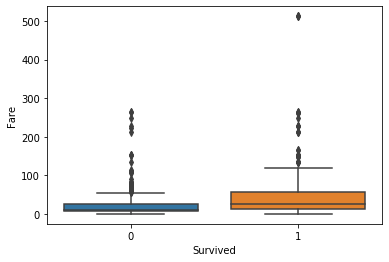

In [11]:
#to identify outlier data
import seaborn as sns
sns.boxplot(x='Survived',y = 'Fare' , data = train_df)

In [12]:
train_df['Fare'] = train_df[train_df['Fare']<400]
test_df['Fare'] = test_df[test_df['Fare']<400]


In [13]:
train_df.groupby('Survived').mean()


,Pclass,Age,SibSp,Parch
Survived,,,,
0,2.531876,30.415100,0.553734,0.329690
1,1.950292,28.549778,0.473684,0.464912


In [14]:
train_df.groupby('Sex').mean()


,Survived,Pclass,Age,SibSp,Parch
Sex,,,,,
female,0.742038,2.159236,28.216730,0.694268,0.649682
male,0.188908,2.389948,30.505824,0.429809,0.235702


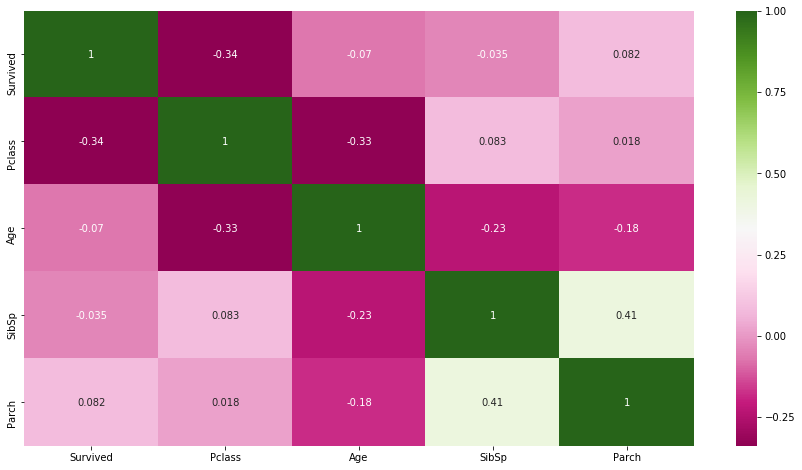

In [15]:
train_df.corr()
plt.subplots(figsize=(15,8))
sns.heatmap(train_df.corr(),annot=True , cmap= 'PiYG')


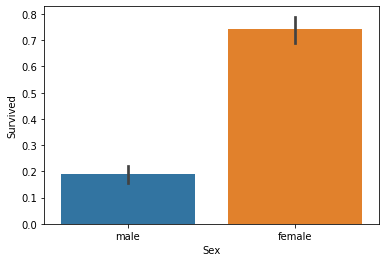

In [16]:
sns.barplot(x='Sex',y='Survived',data= train_df)


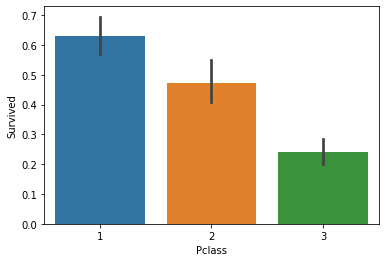

In [17]:
sns.barplot(x='Pclass',y='Survived',data = train_df)


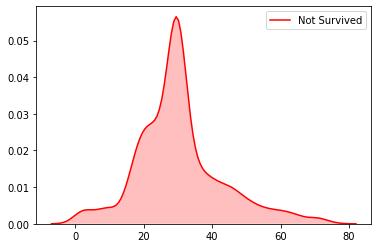

In [18]:
sns.kdeplot(train_df.loc[(train_df['Survived']==0),'Age'],color='r',shade='True',Label='Not Survived',legend = True)


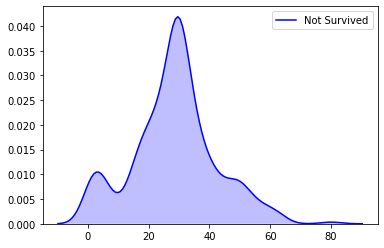

In [19]:
sns.kdeplot(train_df.loc[(train_df['Survived']==1),'Age'],color='b',shade='True',Label=' Survived')


In [20]:
for dataset in data:
    dataset.loc[dataset['Age']<=16,'Age']=0
    dataset.loc[(dataset['Age']>16)&(dataset['Age']<=26),'Age']=1
    dataset.loc[(dataset['Age']>26)&(dataset['Age']<=36),'Age']=2
    dataset.loc[(dataset['Age']>36)&(dataset['Age']<=62),'Age']=3
    dataset.loc[dataset['Age']>62,'Age']=4
    

In [21]:
for dataset in data:
    dataset['Title']=dataset['Name'].str.extract('([A-Za-z]+)\.' , expand = False)


In [22]:
train_df['Title'].value_counts()
test_df['Title'].value_counts()


Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Dona        1
Ms          1
Dr          1
Name: Title, dtype: int64

In [23]:
train_df.drop(['Name','Ticket'], axis=1,inplace=True)
test_df.drop(['Name','Ticket'], axis=1,inplace = True)


In [24]:
train_df.Fare.fillna(0,inplace=True)
test_df.Fare.fillna(0,inplace=True)

In [25]:
for dataset in data:
    train_df['Family_size']=train_df['SibSp']+train_df['Parch']+1
    test_df['Family_size']=test_df['SibSp']+test_df['Parch']+1


In [26]:
def family_group(size):
    a = ' '
    if (size <=1):
        a = 'alone'
    elif(size<=4):
        a = 'small'
    else:
        a = 'large'
    return a

for dataset in data:
    dataset['Family_size']=dataset.Family_size.map(family_group)


In [27]:
for dataset in data:
    dataset.drop(['SibSp','Parch'], axis=1,inplace = True)


In [28]:
train_df = pd.get_dummies(data=train_df,columns=['Sex','Embarked','Family_size','Title'])


In [29]:
test_df = pd.get_dummies(data=test_df,columns=['Sex','Embarked','Family_size','Title'])


In [30]:
train_df.Survived.value_counts()


0    549
1    342
Name: Survived, dtype: int64

In [31]:
list(train_df.columns)



['Survived',
 'Pclass',
 'Age',
 'Fare',
 'Sex_female',
 'Sex_male',
 'Embarked_C',
 'Embarked_Q',
 'Embarked_S',
 'Family_size_alone',
 'Family_size_large',
 'Family_size_small',
 'Title_Capt',
 'Title_Col',
 'Title_Countess',
 'Title_Don',
 'Title_Dr',
 'Title_Jonkheer',
 'Title_Lady',
 'Title_Major',
 'Title_Master',
 'Title_Miss',
 'Title_Mlle',
 'Title_Mme',
 'Title_Mr',
 'Title_Mrs',
 'Title_Ms',
 'Title_Rev',
 'Title_Sir']

In [32]:
list(test_df.columns)

['Pclass',
 'Age',
 'Fare',
 'Sex_female',
 'Sex_male',
 'Embarked_C',
 'Embarked_Q',
 'Embarked_S',
 'Family_size_alone',
 'Family_size_large',
 'Family_size_small',
 'Title_Col',
 'Title_Dona',
 'Title_Dr',
 'Title_Master',
 'Title_Miss',
 'Title_Mr',
 'Title_Mrs',
 'Title_Ms',
 'Title_Rev']

In [33]:
train_df.drop(['Title_Mlle','Title_Lady','Title_Capt','Title_Mme','Title_Sir','Title_Countess','Title_Jonkheer','Title_Major'],axis=1,inplace=True)


In [34]:
#SPLITTING TRAINING DATA 
X= train_df.drop('Survived', axis=1)
y= train_df['Survived']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.4,random_state=0)


In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score,KFold


In [36]:
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RANDOM',RandomForestClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVC',SVC()))

In [37]:
results = []
names = []
seed = 7
scoring = 'accuracy'
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f " % (name, cv_results.mean())
    print(msg)

KNN: 0.926904 
CART: 0.994375 
RANDOM: 0.986897 


E:\mrunali\anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
E:\mrunali\anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
E:\mrunali\anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
E:\mrunali\anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
E:\mrunali\anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default

NB: 0.994410 
SVC: 0.996261 


E:\mrunali\anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
E:\mrunali\anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
E:\mrunali\anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
E:\mrunali\anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default valu

In [38]:
#comparing y_test to predicted result(y_pred) for X_test

clf = SVC()
clf.fit(X_train,y_train)

E:\mrunali\anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [39]:
y_pred = clf.predict(X_test)


In [40]:
y_pred


array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,

In [41]:
np.asarray(y_test)

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,

In [42]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9971988795518207

In [43]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)


array([[221,   0],
       [  1, 135]], dtype=int64)

In [44]:
#fitting classifier to training set and predicting result for testing set
clf.fit(X,y)
prediction = clf.predict(test_df)

E:\mrunali\anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [45]:
prediction

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [47]:
submission = pd.DataFrame({"PassengerId" :test_df.index.values.tolist(),"Survived":prediction})
submission.to_csv('submission.csv',index = False)
submission = pd.read_csv('submission.csv')
submission.head()

,PassengerId,Survived
0,892,1
1,893,1
2,894,1
3,895,1
4,896,1
